# Exercises

## Acquire (acquire.py)

### Zillow

For the following, iterate through the steps you would take to create functions:
Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions. 

You will have a zillow.ipynb file and a helper file for each section in the pipeline. 

#### acquire & summarize

1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database. 
    - **_Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for `airconditioningtypeid`._**  
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.  
    - Only include properties that include a latitude and longitude value.

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [333]:
import pandas as pd
import env

def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
sql_query = '''
SELECT * FROM properties_2017
JOIN predictions_2017 USING (parcelid)
WHERE transactiondate < '2018'
AND propertylandusetypeid = 261
AND longitude IS NOT NULL
AND latitude IS NOT NULL
'''

def get_zillow_data():
    df = pd.read_sql(sql_query, get_connection('zillow'))
    return df

In [334]:
df = get_zillow_data()
df.head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,14297519,1727539,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0,0.025595,2017-01-01
1,17052889,1387261,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,1,0.055619,2017-01-01
2,14186244,11677,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,2,0.005383,2017-01-01
3,12177905,2288172,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,3,-0.103410,2017-01-01
4,12095076,781532,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,773303.0,2016.0,496619.0,9516.26,None,NaN,6.037461e+13,6,-0.001011,2017-01-01


In [335]:
df.shape

(52441, 62)

In [300]:
df.duplicated(subset=['parcelid']).sum()

121

In [301]:
df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')

In [302]:
df.duplicated(subset=['parcelid']).sum()

0

In [155]:
df.shape

(52320, 62)

In [303]:
df.isnull().sum()[:10]

parcelid                        0
id                              0
airconditioningtypeid       38705
architecturalstyletypeid    52250
basementsqft                52273
bathroomcnt                     0
bedroomcnt                      0
buildingclasstypeid         52320
buildingqualitytypeid       18665
calculatedbathnbr             135
dtype: int64

In [332]:
def drop_duplicate_zillow(df):
    df = df.sort_values('transactiondate').drop_duplicates('parcelid',keep='last')
    return df

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [336]:
def summarize_zillow(df):
    
    print('SUMMARY REPORT')
    print('=====================================================\n\n')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================\n\n')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================\n\n')
    print('Dataframe Description: ')
    print(df.describe())
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts(), '\n')
        else:
            print(df[col].value_counts(bins=10, sort=False), '\n')

In [338]:
summarize_zillow(df)

SUMMARY REPORT


Dataframe head: 
   parcelid       id  airconditioningtypeid  architecturalstyletypeid  \
0  14297519  1727539                    NaN                       NaN   
1  17052889  1387261                    NaN                       NaN   
2  14186244    11677                    NaN                       NaN   

   basementsqft  bathroomcnt  bedroomcnt buildingclasstypeid  \
0           NaN          3.5         4.0                None   
1           NaN          1.0         2.0                None   
2           NaN          2.0         3.0                None   

   buildingqualitytypeid  calculatedbathnbr  ...  taxvaluedollarcnt  \
0                    NaN                3.5  ...          1023282.0   
1                    NaN                1.0  ...           464000.0   
2                    NaN                2.0  ...           564778.0   

   assessmentyear  landtaxvaluedollarcnt  taxamount taxdelinquencyflag  \
0          2016.0               537569.0   11013.72      

AttributeError: 'DataFrame' object has no attribute 'dtype'

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values. 

|                          | num_rows_missing | pct_rows_missing  |
| ------------------------ |-----------------:| -----------------:|
| parcelid                 | 0                | 0.000000          |
| airconditioningtypeid    | 29041            | 0.535486          |
| architecturalstyletypeid | 54232            | 0.999982          |


In [73]:
# Nulls By Column

df.isnull().head()

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
0,False,False,True,True,True,False,False,True,True,False,...,False,False,False,False,True,True,False,False,False,False
1,False,False,True,True,True,False,False,True,True,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,True,True,True,False,False,True,True,False,...,False,False,False,False,True,True,False,False,False,False
3,False,False,True,True,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,True,True,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False


In [74]:
(df.isnull().sum()/df.shape[0]*100)[:10]

parcelid                      0.000000
id                            0.000000
airconditioningtypeid        73.977446
architecturalstyletypeid     99.866208
basementsqft                 99.910168
bathroomcnt                   0.000000
bedroomcnt                    0.000000
buildingclasstypeid         100.000000
buildingqualitytypeid        35.674694
calculatedbathnbr             0.258028
dtype: float64

In [75]:
nulls_col = pd.DataFrame({'num_rows_missing': df.isnull().sum(), 
              'percent_rows_missing': (df.isnull().sum() / df.shape[0] * 100)})

nulls_col.sort_values(by='num_rows_missing', ascending=False).head(10)

,num_rows_missing,percent_rows_missing
finishedsquarefeet13,52320,100.000000
buildingclasstypeid,52320,100.000000
finishedsquarefeet15,52320,100.000000
basementsqft,52273,99.910168
storytypeid,52273,99.910168
yardbuildingsqft26,52257,99.879587
architecturalstyletypeid,52250,99.866208
typeconstructiontypeid,52244,99.854740
fireplaceflag,52239,99.845183
finishedsquarefeet6,52155,99.684633


In [304]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing.sort_values(by='num_rows_missing', ascending=False)

In [77]:
nulls_by_col(df).head()

,num_rows_missing,percent_rows_missing
finishedsquarefeet13,52320,100.000000
buildingclasstypeid,52320,100.000000
finishedsquarefeet15,52320,100.000000
basementsqft,52273,99.910168
storytypeid,52273,99.910168


In [305]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})
    rows_missing = df.merge(rows_missing,
                        left_index=True,
                        right_index=True)[['parcelid', 'num_cols_missing', 'percent_cols_missing']]
    return rows_missing.sort_values(by='num_cols_missing', ascending=False)

In [87]:
nulls_by_row(df).head()

,parcelid,num_cols_missing,percent_cols_missing
9001,167686999,42,67.741935
28116,167687839,42,67.741935
41468,17188862,41,66.129032
13429,14460039,40,64.516129
50078,17292931,39,62.903226


#### Prepare 

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.  

In [306]:
df[df['calculatedfinishedsquarefeet'] == 0]

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate


In [307]:
df[df['lotsizesquarefeet'] == 0]

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate


In [309]:
df[(df['bedroomcnt'] == 0) & (df['bathroomcnt'] == 0)]

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
124,14190895,2546776,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,830145.0,2016.0,397522.0,9354.84,None,NaN,6.059022e+13,176,-0.001296,2017-01-03
2694,12227894,1602501,NaN,NaN,NaN,0.0,0.0,None,4.0,NaN,...,185161.0,2016.0,133150.0,2558.37,None,NaN,6.037241e+13,4035,-0.024661,2017-01-19
2899,12146026,856504,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,963472.0,2016.0,954335.0,11016.31,None,NaN,6.037431e+13,4333,-0.661313,2017-01-20
3322,14197244,1580385,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,643406.0,2016.0,258883.0,7046.60,None,NaN,6.059022e+13,4984,0.014172,2017-01-24
4605,14422107,789703,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,2909706.0,2016.0,1405195.0,29392.06,None,NaN,6.059042e+13,6838,0.246856,2017-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49855,13919043,2873456,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,125618.0,2016.0,85957.0,1873.60,None,NaN,6.059088e+13,73763,0.020941,2017-09-05
50078,17292931,2117639,NaN,NaN,NaN,0.0,0.0,None,NaN,NaN,...,468439.0,2016.0,110439.0,4985.16,None,NaN,NaN,74111,0.080163,2017-09-06
51299,12197543,617959,NaN,NaN,NaN,0.0,0.0,None,5.0,NaN,...,183027.0,2016.0,148545.0,2300.32,None,NaN,6.037240e+13,75878,0.238902,2017-09-12
52163,12399434,1759759,NaN,NaN,NaN,0.0,0.0,None,6.0,NaN,...,499000.0,2016.0,350000.0,6315.67,Y,15.0,6.037551e+13,77175,0.509534,2017-09-18


2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).  
    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column.  i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing). 
    - The output:
        - The dataframe with the columns and rows dropped as indicated. *Be sure to drop the columns prior to the rows in your function.*
    - hint:
        - Look up the dropna documentation. 
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

In [310]:
def remove_columns(df, cols_to_remove):
    df = df.drop(columns=cols_to_remove)
    return df

In [311]:
def handle_missing_values(df, prop_required_columns=0.6, prop_required_row=0.75):
    threshold = int(round(prop_required_columns * len(df.index), 0))
    df = df.dropna(axis=1, thresh=threshold) #1, or ‘columns’ : Drop columns which contain missing value
    threshold = int(round(prop_required_row * len(df.columns), 0))
    df = df.dropna(axis=0, thresh=threshold) #0, or ‘index’ : Drop rows which contain missing values.
    return df

In [312]:
def data_prep(df, cols_to_remove=[], prop_required_column=0.6, prop_required_row=0.75):
    df = remove_columns(df, cols_to_remove)
    df = handle_missing_values(df, prop_required_column, prop_required_row)
    return df

In [313]:
df = data_prep(df)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52256 entries, 0 to 52440
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52256 non-null  int64  
 1   id                            52256 non-null  int64  
 2   bathroomcnt                   52256 non-null  float64
 3   bedroomcnt                    52256 non-null  float64
 4   buildingqualitytypeid         33655 non-null  float64
 5   calculatedbathnbr             52185 non-null  float64
 6   calculatedfinishedsquarefeet  52239 non-null  float64
 7   finishedsquarefeet12          52074 non-null  float64
 8   fips                          52256 non-null  float64
 9   fullbathcnt                   52185 non-null  float64
 10  heatingorsystemtypeid         33850 non-null  float64
 11  latitude                      52256 non-null  float64
 12  longitude                     52256 non-null  float64
 13  l

3. Decide how to handle the remaining missing values: 
    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column

In [315]:
# before we impoute the data, split the data first

from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(df,test_size=0.2, random_state=123)
train, validate = train_test_split(train_validate,test_size=0.3, random_state=123)

train.shape,validate.shape, test.shape

((29262, 33), (12542, 33), (10452, 33))

In [316]:
def split_data(df):
    train_validate, test = train_test_split(df,test_size=0.2, random_state=123)
    train, validate = train_test_split(train_validate,test_size=0.3, random_state=123)
    
    return train, validate, test

In [317]:
train.shape

(29262, 33)

In [318]:
train.isnull().sum().sort_values(ascending=False)

buildingqualitytypeid           10340
propertyzoningdesc              10307
unitcnt                         10294
heatingorsystemtypeid           10245
regionidcity                      594
lotsizesquarefeet                 203
finishedsquarefeet12              100
censustractandblock                65
structuretaxvaluedollarcnt         45
fullbathcnt                        37
calculatedbathnbr                  37
yearbuilt                          24
regionidzip                        13
calculatedfinishedsquarefeet       10
taxamount                           2
logerror                            0
id                                  0
taxvaluedollarcnt                   0
assessmentyear                      0
roomcnt                             0
landtaxvaluedollarcnt               0
parcelid                            0
regionidcounty                      0
rawcensustractandblock              0
id                                  0
propertylandusetypeid               0
propertycoun

In [125]:
def value_counts(col):
    return col.value_counts()

In [131]:
value_counts(train.buildingqualitytypeid) # fill with mean

6.0     5728
8.0     4661
4.0     4536
7.0     1967
5.0      844
9.0      619
11.0     299
10.0     127
3.0       83
12.0      53
1.0        3
2.0        2
Name: buildingqualitytypeid, dtype: int64

In [146]:
train.buildingqualitytypeid.mean()

6.278301387270995

In [319]:
train['buildingqualitytypeid'] = train.buildingqualitytypeid.fillna(train.buildingqualitytypeid.mean())

In [320]:
train.shape

(29262, 33)

In [194]:
train.isnull().sum().sort_values(ascending=False)

propertyzoningdesc              10307
unitcnt                         10294
heatingorsystemtypeid           10245
regionidcity                      594
lotsizesquarefeet                 203
finishedsquarefeet12              100
censustractandblock                65
structuretaxvaluedollarcnt         45
calculatedbathnbr                  37
fullbathcnt                        37
yearbuilt                          24
regionidzip                        13
calculatedfinishedsquarefeet       10
taxamount                           2
id                                  0
logerror                            0
landtaxvaluedollarcnt               0
taxvaluedollarcnt                   0
assessmentyear                      0
roomcnt                             0
parcelid                            0
regionidcounty                      0
rawcensustractandblock              0
id                                  0
propertylandusetypeid               0
propertycountylandusecode           0
longitude   

In [132]:
value_counts(train.unitcnt) # fill with mode

1.0    18953
2.0       15
Name: unitcnt, dtype: int64

In [321]:
train['unitcnt'] = train.unitcnt.fillna(train.unitcnt.mode()[0])

In [322]:
train.shape

(29262, 33)

In [215]:
train.isnull().sum().sort_values(ascending=False)

propertyzoningdesc              10307
heatingorsystemtypeid           10245
regionidcity                      594
lotsizesquarefeet                 203
finishedsquarefeet12              100
censustractandblock                65
structuretaxvaluedollarcnt         45
calculatedbathnbr                  37
fullbathcnt                        37
yearbuilt                          24
regionidzip                        13
calculatedfinishedsquarefeet       10
taxamount                           2
logerror                            0
unitcnt                             0
landtaxvaluedollarcnt               0
taxvaluedollarcnt                   0
assessmentyear                      0
id                                  0
roomcnt                             0
parcelid                            0
regionidcounty                      0
rawcensustractandblock              0
id                                  0
propertylandusetypeid               0
propertycountylandusecode           0
longitude   

In [137]:
value_counts(train.unitcnt)

1.0    18953
Name: unitcnt, dtype: int64

In [133]:
value_counts(train.propertyzoningdesc) # use mode

LAR1          3614
LARS           749
LBR1N          604
SCUR2          408
LARA           349
              ... 
DOR1-10000       1
POC4YY           1
POAPTY           1
BGCM*            1
SRR1L1           1
Name: propertyzoningdesc, Length: 1055, dtype: int64

In [323]:
# fill with mode
train['propertyzoningdesc'] = train.propertyzoningdesc.fillna(train.propertyzoningdesc.mode()[0])

In [324]:
# check null value
train.isnull().sum().sort_values(ascending=False)

heatingorsystemtypeid           10245
regionidcity                      594
lotsizesquarefeet                 203
finishedsquarefeet12              100
censustractandblock                65
structuretaxvaluedollarcnt         45
calculatedbathnbr                  37
fullbathcnt                        37
yearbuilt                          24
regionidzip                        13
calculatedfinishedsquarefeet       10
taxamount                           2
taxvaluedollarcnt                   0
unitcnt                             0
parcelid                            0
assessmentyear                      0
landtaxvaluedollarcnt               0
id                                  0
logerror                            0
roomcnt                             0
propertyzoningdesc                  0
regionidcounty                      0
rawcensustractandblock              0
id                                  0
propertylandusetypeid               0
propertycountylandusecode           0
longitude   

In [327]:
train.shape

(29262, 33)

In [134]:
value_counts(train.heatingorsystemtypeid) # use mode

2.0     11668
7.0      6982
6.0       306
20.0       46
13.0        8
18.0        3
1.0         2
10.0        2
Name: heatingorsystemtypeid, dtype: int64

In [326]:
train['heatingorsystemtypeid'] = train.heatingorsystemtypeid.fillna(train.heatingorsystemtypeid.mode()[0])

In [219]:
train.isnull().sum().sort_values(ascending=False)

regionidcity                    594
lotsizesquarefeet               203
finishedsquarefeet12            100
censustractandblock              65
structuretaxvaluedollarcnt       45
fullbathcnt                      37
calculatedbathnbr                37
yearbuilt                        24
regionidzip                      13
calculatedfinishedsquarefeet     10
taxamount                         2
landtaxvaluedollarcnt             0
assessmentyear                    0
taxvaluedollarcnt                 0
id                                0
logerror                          0
unitcnt                           0
roomcnt                           0
parcelid                          0
propertyzoningdesc                0
regionidcounty                    0
rawcensustractandblock            0
id                                0
propertylandusetypeid             0
propertycountylandusecode         0
longitude                         0
latitude                          0
heatingorsystemtypeid       

In [328]:
# drop the rest of the null value

train.dropna(inplace=True)

In [329]:
train.isnull().sum().sort_values(ascending=False)

parcelid                        0
rawcensustractandblock          0
logerror                        0
id                              0
censustractandblock             0
taxamount                       0
landtaxvaluedollarcnt           0
assessmentyear                  0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
yearbuilt                       0
unitcnt                         0
roomcnt                         0
regionidzip                     0
regionidcounty                  0
regionidcity                    0
propertyzoningdesc              0
id                              0
propertylandusetypeid           0
propertycountylandusecode       0
lotsizesquarefeet               0
longitude                       0
latitude                        0
heatingorsystemtypeid           0
fullbathcnt                     0
fips                            0
finishedsquarefeet12            0
calculatedfinishedsquarefeet    0
calculatedbathnbr               0
buildingqualit

In [330]:
train.shape

(28303, 33)

In [331]:
28303/29262

0.9672271204975736

In [339]:
# write a function of imputing missing values

def impute_missing_value_zillow(df):
    df['buildingqualitytypeid'] = df.buildingqualitytypeid.fillna(df.buildingqualitytypeid.mean())
    df['unitcnt'] = df.unitcnt.fillna(df.unitcnt.mode()[0])
    df['propertyzoningdesc'] = df.propertyzoningdesc.fillna(df.propertyzoningdesc.mode()[0])
    df['heatingorsystemtypeid'] = df.heatingorsystemtypeid.fillna(df.heatingorsystemtypeid.mode()[0])
    df.dropna(inplace=True)
    return df

* we still have 96.72% data left after cleanning

#### wrangle_zillow.py

Functions of the work above needed to acquire and prepare a new sample of data.

## Mall Customers

#### notebook

1. Acquire data from mall_customers.customers in mysql database. 
2. Summarize data (include distributions and descriptive statistics).
2. Detect outliers using IQR.
3. Split data (train, validate, and test split).
3. Encode categorical columns using a one hot encoder (pd.get_dummies).
4. Handles missing values.
5. Scaling

In [259]:
def get_connection(db, username=env.username, host=env.host, password=env.password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    
sql_query = '''
SELECT * FROM mall_customers.customers;
'''

def get_mall_data():
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    return df

In [286]:
mall = get_mall_data()
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [237]:
# 2. Summarize data (include distributions and descriptive statistics).

def summarize_mall(df):
    
    print('SUMMARY REPORT')
    print('=====================================================\n\n')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================\n\n')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================\n\n')
    print('Dataframe Description: ')
    print(df.describe())
    
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts(), '\n')
        else:
            print(df[col].value_counts(), '\n')
    print('=====================================================\n\n')
    print('Dataframe info: ')
    print(mall.hist())

SUMMARY REPORT


Dataframe head: 
   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataframe Description: 
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007  

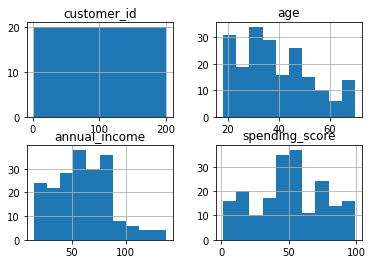

In [238]:
summarize_mall(mall)

In [243]:
# 3. Detect outliers using IQR.
import numpy as np

def get_upper_outliers(s, k=1.5):
    
    q1, q3 = s.quantile([.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

In [246]:
def add_upper_outlier_columns(df, k=1.5):
    
    for col in df.select_dtypes('number'):
        df[col + '_outliers_upper'] = get_upper_outliers(df[col], k)
    return df

In [287]:
mall = add_upper_outlier_columns(mall)

In [275]:
mall.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [288]:
# 4. Split data (train, validate, and test split).

train, validate, test = split_data(mall)
train.shape, validate.shape, test.shape

((112, 9), (48, 9), (40, 9))

In [266]:
# 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

mall_train_dummy = pd.get_dummies(train['gender'], drop_first=True)
mall_train_dummy.head()

,Male
123,1
76,0
171,1
10,1
35,0


In [267]:
train = pd.concat([train, mall_train_dummy], axis=1)
train.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,Male
123,124,Male,39,69,91,0,0,0.0,0,1
76,77,Female,45,54,53,0,0,0.0,0,0
171,172,Male,28,87,75,0,0,0.0,0,1
10,11,Male,67,19,14,0,0,0.0,0,1
35,36,Female,21,33,81,0,0,0.0,0,0


In [268]:
train = train.drop(columns='gender')
train.head()

,customer_id,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,Male
123,124,39,69,91,0,0,0.0,0,1
76,77,45,54,53,0,0,0.0,0,0
171,172,28,87,75,0,0,0.0,0,1
10,11,67,19,14,0,0,0.0,0,1
35,36,21,33,81,0,0,0.0,0,0


In [289]:
def get_dummy(df):
    mall_df_dummy = pd.get_dummies(df['gender'], drop_first=True)
    df = pd.concat([df, mall_df_dummy], axis=1)
    df = df.drop(columns='gender')
    return df

In [290]:
# test function

train = get_dummy(train)
train.head()

,customer_id,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,Male
123,124,39,69,91,0,0,0.0,0,1
76,77,45,54,53,0,0,0.0,0,0
171,172,28,87,75,0,0,0.0,0,1
10,11,67,19,14,0,0,0.0,0,1
35,36,21,33,81,0,0,0.0,0,0


In [269]:
# 6. Handles missing values.

train.isnull().sum()

customer_id                      0
age                              0
annual_income                    0
spending_score                   0
customer_id_outliers_upper       0
age_outliers_upper               0
annual_income_outliers_upper     0
spending_score_outliers_upper    0
Male                             0
dtype: int64

In [271]:
# 7. Scaling

import sklearn.preprocessing

mms = sklearn.preprocessing.MinMaxScaler()

mms.fit(train[['age','annual_income','spending_score']])

train[['age','annual_income','spending_score']] =\
mms.transform(train[['age','annual_income','spending_score']])

train.head()

,customer_id,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,Male
123,124,0.403846,0.442623,0.957447,0,0,0.0,0,1
76,77,0.519231,0.319672,0.553191,0,0,0.0,0,0
171,172,0.192308,0.590164,0.787234,0,0,0.0,0,1
10,11,0.942308,0.032787,0.138298,0,0,0.0,0,1
35,36,0.057692,0.147541,0.851064,0,0,0.0,0,0


In [291]:
def scale_mall_data(df):
    mms = sklearn.preprocessing.MinMaxScaler()

    mms.fit(df[['age','annual_income','spending_score']])

    df[['age','annual_income','spending_score']] =\
    mms.transform(train[['age','annual_income','spending_score']])
    
    return df

In [292]:
# test function

train = scale_mall_data(train)
train.head()

,customer_id,age,annual_income,spending_score,customer_id_outliers_upper,age_outliers_upper,annual_income_outliers_upper,spending_score_outliers_upper,Male
123,124,0.403846,0.442623,0.957447,0,0,0.0,0,1
76,77,0.519231,0.319672,0.553191,0,0,0.0,0,0
171,172,0.192308,0.590164,0.787234,0,0,0.0,0,1
10,11,0.942308,0.032787,0.138298,0,0,0.0,0,1
35,36,0.057692,0.147541,0.851064,0,0,0.0,0,0


#### wrangle_mall.py 

1. Acquire data from mall_customers.customers in mysql database. 
2. Split the data into train, validate, and split
3. One-hot-encoding (pd.get_dummies)
3. Missing values
4. Scaling